In [1]:
import os
import shutil
import random
from tqdm import tqdm
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

import monai
from monai import transforms

Failed to load image Python extension: Could not find module 'D:\Apps\anaconda3\envs\medical\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.


In [2]:
def adjust_window(image, window_level=35, window_width=85):
    # 计算窗宽和窗位的最小和最大值
    min_value = window_level - window_width // 2
    max_value = window_level + window_width // 2

    # 将图像裁剪到指定的窗宽范围内
    windowed_image = np.clip(image, min_value, max_value)

    # 归一化图像到0-255范围
    windowed_image = ((windowed_image - min_value) / (max_value - min_value) * 255).astype(np.uint8)

    return windowed_image

In [3]:
def visualize(original_image, original_mask, image=None, mask=None, idx=20):
    original_image = original_image.numpy()
    original_image = adjust_window(original_image)
    original_mask = original_mask.numpy()
    original_image = original_image[:, :, idx]
    original_mask = original_mask[:, :, idx]
    if image is not None:
        image = image.numpy()
        image = adjust_window(image)
        image = mask[:, :, idx]
    if mask is not None:
        mask = mask.numpy()
        mask = mask[:, :, idx]
        
    
    fontsize = 12

    if image is None and mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(original_image, cmap='gray')
        ax[1].imshow(original_mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image, cmap='gray')
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image, cmap='gray')
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [4]:
def print_info(data):
    print(f"image shape: {data['image'].shape}, image type: {type(data['image'])}")
    print(f"label shape: {data['label'].shape}, label type: {type(data['label'])}")

In [5]:
data_dict = {
    'image': 'data/ID_c9d6fdc6_ID_7f09be285d.nii.gz',
    'label': 'data/ID_c9d6fdc6_ID_7f09be285d-ich_pred.nii.gz'
}

In [6]:
# 数据读取
io_transform = transforms.LoadImaged(keys=["image", "label"])
data = io_transform(data_dict)
image, label = data['image'], data['label']
print(f"image shape: {image.shape}, image type: {type(image)}")
print(f"label shape: {label.shape}, label type: {type(label)}")

image shape: torch.Size([512, 512, 38]), image type: <class 'monai.data.meta_tensor.MetaTensor'>
label shape: torch.Size([512, 512, 38]), label type: <class 'monai.data.meta_tensor.MetaTensor'>


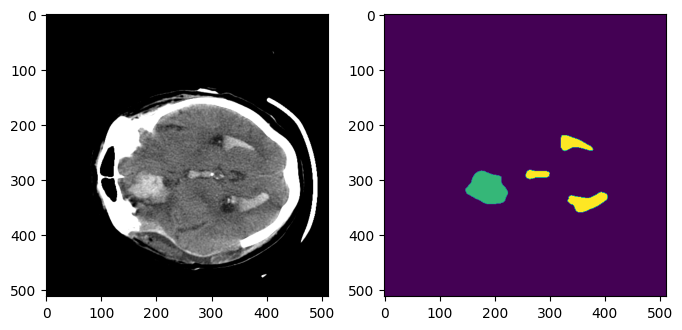

In [7]:
visualize(image, label)

In [8]:
# 添加channel维度
transform = transforms.EnsureChannelFirstd(keys=["image", "label"])
aug_data = transform(data)
print_info(aug_data)

image shape: torch.Size([1, 512, 512, 38]), image type: <class 'monai.data.meta_tensor.MetaTensor'>
label shape: torch.Size([1, 512, 512, 38]), label type: <class 'monai.data.meta_tensor.MetaTensor'>


In [11]:
# 数据保存
transform = transforms.SaveImaged(keys=["image", "label"], output_dir="output", output_ext=".nii.gz", separate_folder=False)
aug_data = transform(data)
print_info(aug_data)

2025-05-15 19:46:15,453 INFO image_writer.py:197 - writing: output\ID_c9d6fdc6_ID_7f09be285d_trans.nii.gz
2025-05-15 19:46:16,273 INFO image_writer.py:197 - writing: output\ID_c9d6fdc6_ID_7f09be285d-ich_pred_trans.nii.gz
image shape: torch.Size([512, 512, 38]), image type: <class 'monai.data.meta_tensor.MetaTensor'>
label shape: torch.Size([512, 512, 38]), label type: <class 'monai.data.meta_tensor.MetaTensor'>
